### Laurence Warner

## 1 

### a 

In [18]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
p = 0.85
mu = 11.4
sig = 0.7

In [6]:
z_init = mu

In [7]:
T = 500

In [9]:
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
                           random_state=25)

In [11]:
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sig)

In [13]:
eps_vec.shape

(500,)

(array([   2.,   11.,   40.,   63.,  112.,  126.,   82.,   40.,   18.,    6.]),
 array([-2.19044538, -1.76677889, -1.34311239, -0.9194459 , -0.49577941,
        -0.07211291,  0.35155358,  0.77522008,  1.19888657,  1.62255306,
         2.04621956]),
 <a list of 10 Patch objects>)

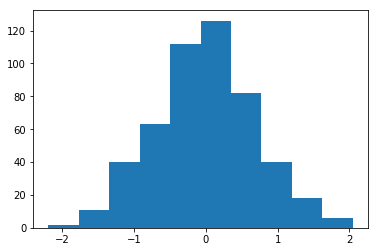

In [19]:
plt.hist(eps_vec)

In [27]:
z = np.zeros(T+1)

In [28]:
z[0] = mu

In [29]:
z

array([ 11.4,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,

In [25]:
def update_next(curr, p, mu, eps):
    z_next = p*curr + (1-p)*mu + eps
    return z_next

In [32]:
one = update_next(z[0], p, mu, eps_vec[0])

In [33]:
one

12.188884692640293

Loop iteratively

In [34]:
for i in range(0, T):
    z[i+1] = update_next(z[i], p, mu, eps_vec[i])

In [35]:
z

array([ 11.4       ,  12.18888469,  12.2159573 ,  11.68315782,
        11.01553877,  10.91590679,  10.1567745 ,  10.68040553,
        10.67842452,  10.88565201,  10.72508687,  10.65326395,
         9.91791397,  10.04701032,  10.40104919,   9.86045939,
        10.12776085,  10.00300618,  10.57799829,  10.46230611,
        11.28872644,  11.27266911,  11.3207326 ,  11.12438321,
        13.13436557,  12.89920999,  12.77832705,  11.29822341,
        11.72133346,  11.53360466,  11.40244288,  10.99761888,
        11.95615748,  12.17992382,  11.98569528,  11.51007151,
        11.53889543,  11.62239461,  12.05084072,  12.61656985,
        13.08475995,  11.83484479,  12.02965801,  11.58664022,
        11.60122697,  12.78131856,  13.40791974,  12.73042248,
        12.55257799,  11.43553918,  11.68434424,  10.86117739,
        11.45112658,  10.44432582,  10.28175407,  10.77658964,
        10.88626827,  11.24280425,  11.44757108,  11.84646005,
        11.62959357,  11.41153827,  12.06439749,  12.35

In [37]:
z_100 = z[:100]

Text(0,0.5,'$x_t$')

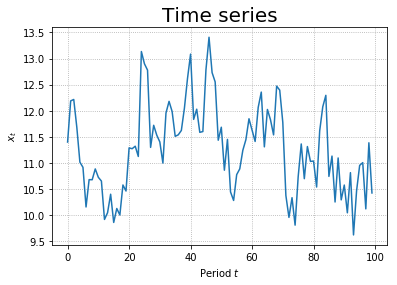

In [42]:
plt.plot(np.arange(0,100), z_100, '-')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'Time series', fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$x_t$')